## Ramen Ratings

#### Project Goal and Dataset Description

<h3>This Project is a part of self-learning and enhancement of knowledge in the field of Data Science and Data Analysis</h3>

<h4>In this Project, We will evaluate and get insights over Ramen ratings of the world</h4>

<b>Dataset Description:</b>
Ramen-Analysis: The Dataset was drived from Kaggle Website. The Dataset Contains 7 set of Attributes which includes:-
<ol>
<li> Reviews #: Review ID(Integer)</li>
<li> Brand: To which brand the ramen is associated with(Object)</li>
<li> Style: Style of Ramen['Cup','Box','Tray','Bowl','Pack'](Categorical)</li>
<li> Variety: Variety of the ramen associated with the brand(object)</li>
<li> Country: Name of the Country Sold in(object)</li>
<li> Ratings: Rated on scale of 1-5(object)</li>
<li> Top Ten: In which and rank the ramen was in Top ten(object)</li>
</ol>

#### Installing Certain packages

In [1]:
!pip install plotly
!pip install geopy

#### Importing Libraries

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from collections import defaultdict
import plotly
import re
import plotly.express as px
import plotly.graph_objects as go

#### Importing Dataset

In [3]:
df = pd.read_csv('DataSets/ramen-ratings.csv')

#### EDA & Data Vizualization 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
df.drop(columns=['Review #','Top Ten'],inplace=True)

In [6]:
df['Stars'].replace('Unrated',0,inplace=True)

In [7]:
df['Stars']= pd.to_numeric(df['Stars'],errors='coerce')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2579
Data columns (total 5 columns):
Brand      2575 non-null object
Variety    2575 non-null object
Style      2573 non-null object
Country    2575 non-null object
Stars      2575 non-null float64
dtypes: float64(1), object(4)
memory usage: 120.7+ KB


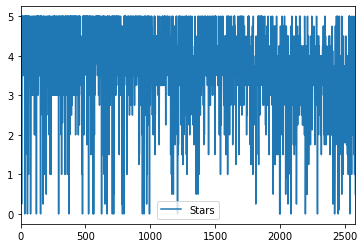

In [10]:
df.plot()

In [11]:
df.head()

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


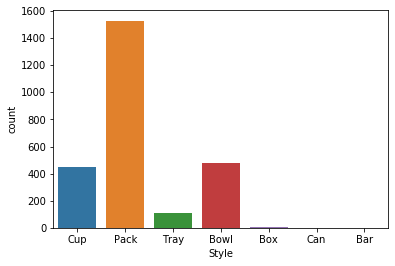

In [12]:
sns.countplot(df['Style'])

In [13]:
df.groupby(df['Country']).size() # Number of Brands per country

Country
Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            168
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        125
Japan            351
Malaysia         155
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      309
Sweden             3
Taiwan           224
Thailand         190
UK                69
USA              323
United States      1
Vietnam          108
dtype: int64

In [14]:
df.groupby(df['Country'])['Brand','Variety'].max() #Top Rated Ramen Country Wise

,Brand,Variety
Country,,
Australia,Trident,Singapore Soft Noodles
Bangladesh,Pran,Oriental Style Instant Noodles Tandoori Flavour
Brazil,Nissin,Lamen Sabor Picanha
Cambodia,Mama,Instant Noodles chicken Green Curry Flavour
Canada,Western Family,Vegetarian Flavour Ramen Noodles
China,Xiuhe,dried Mix Noodles Soya Bean Paste
Colombia,Nissin,Sabor A Pollo Sopa Instantánea Con Fideos
Dubai,Golden Mie,chicken
Estonia,Baltix,Instant Noodles With Chicken Flavour Broth


In [144]:
Country,Brand = df['Country'].to_list(),df['Brand'].to_list()
d = defaultdict(list)
for i,j in zip(Country,Brand):
    d[j].append(i)
Brand_Diff = dict(d)
Brand_Diff = {k:list(set(j)) for k,j in Brand_Diff.items()}
Brands = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in Brand_Diff.items() ]))
Brands = Brands.transpose()

In [145]:
Brands.replace(np.nan,"NA",inplace=True)
Brands['Countries'] =Brands[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].apply(lambda x: ','.join(x), axis=1)

In [146]:
Brands.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], inplace=True)

In [147]:
def clean(text):
    cleanr = re.compile(',NA')
    se = re.sub(cleanr, '', text)
    return se
def count_C(text):
    se =text.split(',')
    a = len(se)
    return a

In [148]:
Brands['Country'] = Brands['Countries'].apply(lambda x:clean(x))
Brands.drop(columns=["Countries"], inplace=True)

In [149]:
Brands['Number_of_Countries'] = Brands['Country'].apply(lambda x:count_C(x))

In [150]:
Brands.reset_index(inplace=True)

In [151]:
Brands

,index,Country,Number_of_Countries
0,New Touch,Japan,1
1,Acecook,"Japan,Vietnam",2
2,Ikeda Shoku,Japan,1
3,Ripe'n'Dry,Japan,1
4,Nissin,"Japan,Hungary,Thailand,Philippines,Mexico,Braz...",14
...,...,...,...
350,ICA,Sweden,1
351,Katoz,Sweden,1
352,Baltix,Estonia,1
353,Amino,Poland,1


In [25]:
Top_rated = df[df['Stars'] == 5]
Top_rated.groupby(df['Brand'])['Variety','Style'].max() #Total 106 Top Rated Ramen

,Variety,Style
Brand,,
A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Tray
ABC,Mi Goreng Pangsit Fried Noodle With Dumpling,Pack
Acecook,Comet Mori Yukino Tan-tan men,Bowl
Ah Lai,Penang Favourite White Curry Rice Vermicelli,Pack
Amianda,Tachia Dried Noodles - Rou Zhou Meat Sauce,Pack
...,...,...
Wu Mu,Steam Spinach Ramen With Onion,Pack
Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack
Xiao Ban Mian,Traditional Shallot & Onion Oil Noodle,Pack


In [26]:
Top_rated.groupby(df['Country'])['Brand','Variety','Style'].max()

,Brand,Variety,Style
Country,,,
Australia,Maggi,Fusian Special Edition Ow... Ow... Spicy Cow M...,Pack
Brazil,Nissin,Cup Noodles Sabor Franhp Com Requeijao,Cup
Cambodia,Mama,Instant Noodles chicken Green Curry Flavour,Pack
Canada,Sapporo Ichiban,Cuisine Adventures Chicken Pho Soup,Pack
China,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack
Germany,Nissin,Soba Yakitori Chicken,Cup
Hong Kong,Sau Tao,Taisho Fried Noodle Sesame Paste Flavour Insta...,Pack
India,Patanjali,Atta Noodles Jhatpat Banao Befikr Khao,Pack
Indonesia,World O' Noodle,Special Fried Curly Noodle (Local),Pack


In [53]:
Low_rated = df[df['Stars'] < 2]
Low_rated.groupby(df['Brand'])['Variety','Style'].min()

,Variety,Style
Brand,,
A-One,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup
A1,Vegetarian Herbal Noodle,Pack
Acecook,Super Big Ramen Soy Sauce,Bowl
Annie Chun's,Soy Ginger Ramen,Bowl
Asian Thai Foods,Rumpum Gundruk Flavour,Pack
...,...,...
Wai Wai,Chicken Flavor,Pack
Weh Lih,GGE Noodle Snack Wheat Crackers Original Ramen,Pack
Wei Lih,Artificial Beef Flavor,Pack


In [54]:
Low_rated.groupby(df['Country'])['Brand','Variety','Style'].min()

,Brand,Variety,Style
Country,,,
Australia,Fantastic,Noodles Crispy Bacon Flavour,Cup
Canada,Azami,Beef Flavour Instant Noodles,Bowl
China,Baijia,Artificial Abalone Crab Flavor Instant Noodle,Bowl
Hong Kong,Chewy,Demae Rice Vermicelli Chicken Flavour Instant ...,Pack
India,Maggi,Cup Noodles Pani Puri,Cup
Indonesia,Indomie,Instant Cup Mi Kuah Rasa Baso Spesial,Cup
Japan,Acecook,Brown Rice Ramen,Bowl
Malaysia,A1,Plain Noodles,Pack
Nepal,Asian Thai Foods,Rumpum Gundruk Flavour,Pack


In [46]:
#Creating Lat Long with Country
Countries = df['Country'].unique().tolist()
lat,lon = [],[]
for i in Countries:
    nom = Nominatim(user_agent='User agent1')
    loc = nom.geocode(i)
    lat.append(loc.latitude)
    lon.append(loc.longitude)

df_countries = pd.DataFrame({"Country":Countries,"Lat":lat,"Lon":lon})

In [47]:
df_countries

,Country,Lat,Lon
0,Japan,36.574844,139.239418
1,Taiwan,23.973937,120.982018
2,USA,39.783730,-100.445882
3,India,22.351115,78.667743
4,South Korea,36.558191,127.940856
5,Singapore,1.357107,103.819499
6,Thailand,14.897192,100.832730
7,Hong Kong,22.279328,114.162813
8,Vietnam,13.290403,108.426511
9,Ghana,8.030028,-1.080027


In [48]:
df = pd.merge(df,df_countries, on="Country",how='inner')

In [49]:
df

,Brand,Variety,Style,Country,Stars,Lat,Lon
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,36.574844,139.239418
1,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,36.574844,139.239418
2,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,36.574844,139.239418
3,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,36.574844,139.239418
4,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.50,36.574844,139.239418
...,...,...,...,...,...,...,...
2570,Vifon,Pomidorowa (Mild Tomato),Pack,Poland,4.00,52.215933,19.134422
2571,Amino,Zurek,Pack,Poland,3.25,52.215933,19.134422
2572,Golden Mie,Vegetable,Pack,Dubai,3.75,25.065700,55.171300
2573,Golden Mie,chicken,Pack,Dubai,3.25,25.065700,55.171300


In [76]:
#World Map
fig = px.scatter_geo(df, lat=df['Lat'], lon=df['Lon'],color='Country',
                           color_continuous_scale="Viridis",
                           range_color=(0, 36),hover_name="Country", size="Stars",animation_frame="Stars",
                           title="Star Rating Country Wise",
                            projection="natural earth"
                          )
fig.show()

In [90]:
a = df.groupby('Country').count()['Brand'].to_list()

In [92]:
df_countries["No_of_Brands"]=a

In [98]:
df_countries.sort_values(by='No_of_Brands',inplace=True)

In [102]:
fig = px.scatter_geo(df_countries, lat='Lat', lon='Lon',color='Country',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),hover_name="Country", size="No_of_Brands",
                           title="No of brands Country Wise",
                            projection="natural earth"
                          )
fig.show()

In [153]:
Brands.sort_values(by='Number_of_Countries',inplace=True)
BrandsT = Brands.tail(10) 
fig = px.bar(BrandsT, x='index', y='Number_of_Countries',title="Global Brands")
fig.show()

In [160]:
No_Style = Top_rated.groupby('Style').count()
No_Style.reset_index(inplace=True)
fig = px.bar(No_Style, x='Style', y='Brand',title="Top Preferred Style")
fig.show()

In [161]:
LNo_Style = Low_rated.groupby('Style').count()
LNo_Style.reset_index(inplace=True)
fig = px.bar(LNo_Style, x='Style', y='Brand',title="Least Preferred Style")
fig.show()

In [163]:
fig = go.Figure()
fig.add_trace(go.Bar(x=No_Style['Style'],
                y=No_Style['Brand'],
                name='Top Preferred Style',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=LNo_Style['Style'],
                y=LNo_Style['Brand'],
                name='Least Preferred Style',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Preferred Style Comparision',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='No of Brands',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [165]:
fig = px.pie(df, values='Stars', names='Country', title='Cumulative Ramen Ratings of Country')
fig.show()

## Conclusion:

<p>
    With the above analysis Top Rated and Low Rated Brands or Style does not depend on the style sold at the store.
    This ratings perhaps subjective in terms brands or likes of the user, Where the brand manufacters different
    varierties of Ramen.
</p>
<p>
        The least rated ramen where the fusion of different set of dishes where it didn't perform according to the customers likes and taste. With this top know brand such has Nissin is widely spread in the world with maximun of 14 countries. Though it is widely spread it has got 50%-50% of user rating for different vareities of ramen. 
</p>

## Future Analysis

<p>
    <ol>
    <li>Use of NLP with Current user reviews</li>
    <li>Provide Sentimental Analysis for Each Review</li>
    </ol>
</p>